# Before next session.

1) Python

2) Jupyter Notebook

3) Account on Kaggle.com

4) Downloading the dataset

# What is Machine Learning?

Machine learning is the science of getting computers to act without being explicitly
programmed. -(Stanford University)

# Dataset

https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# Part 0 - Exploring the data

In [1]:
# Import necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# Load 1 million rows from the csv file
train=pd.read_csv("train.csv",nrows=1000000)

In [3]:
# Taking a look at the data
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [5]:
# Get rides with 0 passenger counts
no_passenger_rides = train[train['passenger_count']==0]
no_passenger_rides.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,2015-06-02 23:16:15.00000012,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0
566,2012-01-28 21:33:18.0000002,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0
678,2012-02-27 07:24:20.0000003,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0
1160,2011-05-25 23:58:48.0000001,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0
1935,2011-10-23 11:09:28.0000001,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0


In [6]:
# Count number of such instances.
len(no_passenger_rides)

3565

In [7]:
# Get rows with negative fare amount
negative_fare_rides = train[train['fare_amount']<0]

In [8]:
negative_fare_rides

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.90,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.50,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.00,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.50,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.50,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,2015-03-09 10:29:46.0000004,-5.00,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
56748,2015-06-26 01:13:18.0000002,-5.00,2015-06-26 01:13:18 UTC,-73.979797,40.743240,-73.981216,40.737240,6
58937,2010-02-19 23:47:10.0000002,-44.90,2010-02-19 23:47:10 UTC,-73.871120,40.773902,-73.676533,40.786890,1
97838,2015-06-07 02:54:14.0000004,-3.00,2015-06-07 02:54:14 UTC,-73.913246,40.766212,-73.914963,40.764065,5
102938,2010-02-10 12:33:10.0000004,-2.90,2010-02-10 12:33:10 UTC,-73.970775,40.783425,-73.973443,40.779775,1


In [9]:
# Convert negative fare amount to positive fare amount 
train['fare_amount'] = train['fare_amount'].apply(lambda x: abs(x))

In [10]:
# Check the fares
negative_fare_rides = train[train['fare_amount']<0]

In [11]:
negative_fare_rides

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [12]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348543,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.821554,12.057937,7.626154,11.324494,8.201418,1.323911
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [13]:
# Drop rows with atleast 1 nan value
train.dropna(inplace=True)

In [14]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.348417,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821253,12.057778,7.626087,11.324494,8.201418,1.323907
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [15]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [16]:
# Calculates distance from geographic coordinates
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [17]:
train['distance_miles']=distance(train.pickup_latitude,train.pickup_longitude,train.dropoff_latitude,train.dropoff_longitude)

In [18]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.242218


Distance histogram

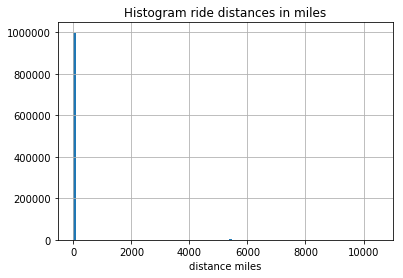

In [19]:
train.distance_miles.hist(bins=100)
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
plt.show()

Distance histogram for less than 50 miles

In [20]:
less_than_1000=train[train['distance_miles']<50]

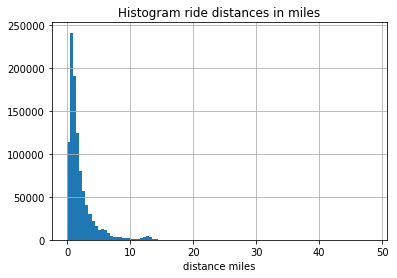

In [21]:
less_than_1000.distance_miles.hist(bins=100)
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
plt.show()

In [22]:
# Returns weekday for the given date
from dateutil import parser
def weekday(dates):
    days=[]
    d={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    for i in dates:
        days.append(d[parser.parse(i).strftime("%A")])
    return days
    

In [23]:
train['pickup_weekday']=weekday(train.pickup_datetime)

In [24]:
# Returns hour of the day for the given date
def hour(dates):
    hours=[]
    for i in dates:
        hours.append(parser.parse(str(i)).hour)
    return hours

In [ ]:
parser.parse('2009-06-15 17:26:21 UTC').hour

17

In [ ]:
pick_up_hours=hour(train.pickup_datetime)

In [ ]:
train['pick_up_hour']=pick_up_hours

In [ ]:
train.head()